# **CNN Image Classifier [ Cats + Dogs ] using TensorFlow and Keras Libraries**

build developed from the following references:

[1] Strika.L (2019) Convolutional Neural Networks : A Python Tutorial Using TensorFlow and Keras https://www.kdnuggets.com/2019/07/convolutional-neural-networks-python-tutorial-tensorflow-keras.html
https://github.com/StrikingLoo/Cats-and-dogs-classifier-tensorflow-CNN/blob/master/Convolutional_experiments.ipynb

[2] Google (2023) Intro to Neural Nets
https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/intro_to_neural_nets.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=intro_to_nn_tf2-colab&hl=en

[3] Google Open Source (2022) Image Classification Excercises
https://github.com/google/eng-edu/tree/main/ml/pc/exercises

#PreProcessing of Data

In [5]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2023-04-17 01:04:34--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.107.128, 74.125.196.128, 173.194.213.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   136MB/s    in 0.5s    

2023-04-17 01:04:34 (136 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



##Importing required libraries + setting up input layer

Extracting dataset

In [6]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Import Libraries 

* used for data processing and visualisation and ML tasks.




In [7]:
import tensorflow as tf
import seaborn as sns
import numpy as np

from PIL import Image
import glob
from collections import defaultdict
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
 IMG_SIZE = (94, 125)
def pixels_from_path(file_path):
    im = Image.open(file_path)
    
    im = im.resize(IMG_SIZE)
    np_im = np.array(im)
    #matrix of pixel RGB values
    return np_im

In [10]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [12]:
glob.glob('/tmp/cats_and_dogs_filtered/train/cats/*')

['/tmp/cats_and_dogs_filtered/train/cats/cat.758.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.844.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.64.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.468.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.802.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.126.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.623.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.539.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.592.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.881.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.525.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.904.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.360.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.805.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.354.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.89.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.625.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.482.jpg',
 '/tmp/cats_

In [13]:
shape_counts = defaultdict(int)
for i, cat in enumerate(glob.glob('/tmp/cats_and_dogs_filtered/train/cats/*')[:1000]):
    if i%100==0:
        print(i)
    img_shape = pixels_from_path(cat).shape
    shape_counts[str(img_shape)]= shape_counts[str(img_shape)]+ 1

0
100
200
300
400
500
600
700
800
900


In [14]:
shape_items = list(shape_counts.items())
shape_items.sort(key = lambda x: x[1])
shape_items.reverse()

In [15]:
validation_size = 0.1
img_size = IMG_SIZE
num_channels = 3
sample_size = 8192

In [16]:
len(glob.glob('/tmp/cats_and_dogs_filtered/train/cats/*'))

1000

In [17]:
pixels_from_path(glob.glob('/tmp/cats_and_dogs_filtered/train/cats/*')[5]).shape

(125, 94, 3)

In [19]:
SAMPLE_SIZE = 250
print("Loading Training Cat Images : ")
cat_train_set = np.asarray([pixels_from_path(cat) for cat in glob.glob('/tmp/cats_and_dogs_filtered/train/cats/*')[:SAMPLE_SIZE]])
print("Loading Training Dog Images : ")
dog_train_set = np.asarray([pixels_from_path(dog) for dog in glob.glob('/tmp/cats_and_dogs_filtered/train/dogs/*')[:SAMPLE_SIZE]])

Loading Training Cat Images : 
Loading Training Dog Images : 


In [21]:
valid_size = 500
print("Loading Validation Cat Images : ")
cat_valid_set = np.asarray([pixels_from_path(cat) for cat in glob.glob('/tmp/cats_and_dogs_filtered/train/cats/*')[-valid_size:]])
print("Loading Validation Dog Images : ")
dog_valid_set = np.asarray([pixels_from_path(dog) for dog in glob.glob('/tmp/cats_and_dogs_filtered/train/dogs/*')[-valid_size:]])

Loading Validation Cat Images : 
Loading Validation Dog Images : 


In [22]:
x_train = np.concatenate([cat_train_set, dog_train_set])

labels_train = np.asarray([1 for _ in range(SAMPLE_SIZE)]+[0 for _ in range(SAMPLE_SIZE)])

In [23]:
x_valid = np.concatenate([cat_valid_set, dog_valid_set])
labels_valid = np.asarray([1 for _ in range(valid_size)]+[0 for _ in range(valid_size)])

In [24]:
x_train.shape

(500, 125, 94, 3)

In [25]:
labels_train.shape

(500,)

# Running Single Hidden Layer Fully Connected Neural Network

In [26]:
from tensorflow import keras
from tensorflow.keras import layers
total_pixels = img_size[0] *img_size[1] * 3
fc_size = 512
inputs = keras.Input(shape=(img_size[1], img_size[0],3), name='ani_image')
x = layers.Flatten(name = 'flattened_img')(inputs) #turn image to vector.
x = layers.Dense(fc_size, activation='relu', name='first_layer')(x)
outputs = layers.Dense(1, activation='sigmoid', name='class')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

Training with AdamOptimizer(fastest)

In [27]:
customAdam = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=customAdam,  #Optimizer
              # Loss Function to minimise
              loss="mean_squared_error",
              # List of metrics to monitor model performance
              metrics=["binary_crossentropy","mean_squared_error"])

10 epochs to avoid underfitting and ensure no overfitting for dataset size

In [28]:
print('# Fit model on training data')

history = model.fit(x_train, 
                    labels_train,
                    batch_size=32, 
                    shuffle = True, # Due to load order of cats first and dogs second, intention is to reduce bias
                    epochs=10,
                    validation_data=(x_valid, labels_valid))

# Fit model on training data
Epoch 1/10
16/16 [==============================] - 8s 406ms/step - loss: 0.5060 - binary_crossentropy: 1265.1827 - mean_squared_error: 0.5060 - val_loss: 0.5000 - val_binary_crossentropy: 3061.9863 - val_mean_squared_error: 0.5000
Epoch 2/10
16/16 [==============================] - 7s 473ms/step - loss: 0.5000 - binary_crossentropy: 3627.2185 - mean_squared_error: 0.5000 - val_loss: 0.5000 - val_binary_crossentropy: 4099.9053 - val_mean_squared_error: 0.5000
Epoch 3/10
16/16 [==============================] - 8s 487ms/step - loss: 0.5000 - binary_crossentropy: 4234.3003 - mean_squared_error: 0.5000 - val_loss: 0.5000 - val_binary_crossentropy: 4331.9360 - val_mean_squared_error: 0.5000
Epoch 4/10
16/16 [==============================] - 6s 400ms/step - loss: 0.5000 - binary_crossentropy: 4361.6387 - mean_squared_error: 0.5000 - val_loss: 0.5000 - val_binary_crossentropy: 4382.3101 - val_mean_squared_error: 0.5000
Epoch 5/10
16/16 [=========================

#Training a Single Convolutional Layer Neural Network

*  24 kernels and 2 fully connected layers
*  max pooling to reduce every four neurons to a single one with the highest value of the four

In [29]:
fc_layer_size = 128
img_size = IMG_SIZE
conv_inputs = keras.Input(shape=(img_size[1], img_size[0],3), name='ani_image')
conv_layer = layers.Conv2D(24, kernel_size=3, activation='relu')(conv_inputs)
conv_layer = layers.MaxPool2D(pool_size=(2,2))(conv_layer)
conv_x = layers.Flatten(name = 'flattened_features')(conv_layer)
conv_x = layers.Dense(fc_layer_size, activation='relu', name='first_layer')(conv_x)
conv_x = layers.Dense(fc_layer_size, activation='relu', name='second_layer')(conv_x)
conv_outputs = layers.Dense(1, activation='sigmoid', name='class')(conv_x)
conv_model = keras.Model(inputs=conv_inputs, outputs=conv_outputs)

In [30]:
customAdam = keras.optimizers.Adam(lr=1e-6)
conv_model.compile(
    optimizer=customAdam,
    loss="binary_crossentropy",
    metrics=["binary_crossentropy", "mean_squared_error"]
)


5 epochs, performance improvement compared to previous networks 

In [31]:
print('# Fit model on training data')

history = conv_model.fit(x_train, 
                    labels_train,
                    batch_size=32, 
                    shuffle = True,
                    epochs=5,
                    validation_data=(x_valid, labels_valid))

# Fit model on training data
Epoch 1/5
16/16 [==============================] - 13s 754ms/step - loss: 279.6039 - binary_crossentropy: 279.6039 - mean_squared_error: 0.5081 - val_loss: 98.2788 - val_binary_crossentropy: 98.2788 - val_mean_squared_error: 0.5000
Epoch 2/5
16/16 [==============================] - 10s 614ms/step - loss: 39.5589 - binary_crossentropy: 39.5589 - mean_squared_error: 0.4994 - val_loss: 6.1429 - val_binary_crossentropy: 6.1429 - val_mean_squared_error: 0.3687
Epoch 3/5
16/16 [==============================] - 8s 490ms/step - loss: 7.5417 - binary_crossentropy: 7.5417 - mean_squared_error: 0.3079 - val_loss: 10.3281 - val_binary_crossentropy: 10.3281 - val_mean_squared_error: 0.4008
Epoch 4/5
16/16 [==============================] - 10s 646ms/step - loss: 3.1724 - binary_crossentropy: 3.1724 - mean_squared_error: 0.2071 - val_loss: 5.2424 - val_binary_crossentropy: 5.2424 - val_mean_squared_error: 0.3680
Epoch 5/5
16/16 [==============================] - 11s 701

measuring Pearson correlation between predication and validation labels

In [37]:
preds = conv_model.predict(x_valid)
preds = np.asarray([pred[0] for pred in preds])
corr_coef = np.corrcoef(preds, labels_valid)
np.corrcoef(preds, labels_valid)[0][1] 

32/32 [==============================] - 7s 204ms/step


-0.026951876620281236

Visualisation

<Axes: >

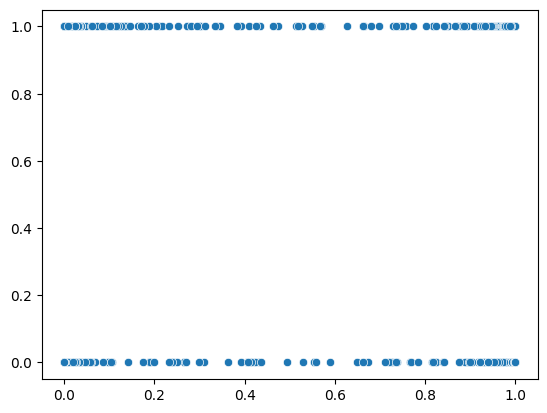

In [33]:
sns.scatterplot(x= preds, y= labels_valid)

In [34]:
cat_quantity = sum(labels_valid)
for i in range(1,10):
    threshold = .1*i
    print('threshold: ' + str(threshold))
    precision = sum(labels_valid[preds > threshold]) / preds[preds > threshold].shape[0]
    print('precision: ' + str(precision))

threshold: 0.1
precision: 0.6061776061776062
threshold: 0.2
precision: 0.6008064516129032
threshold: 0.30000000000000004
precision: 0.606694560669456
threshold: 0.4
precision: 0.6038543897216274
threshold: 0.5
precision: 0.6128318584070797
threshold: 0.6000000000000001
precision: 0.6141552511415526
threshold: 0.7000000000000001
precision: 0.6130536130536131
threshold: 0.8
precision: 0.6183574879227053
threshold: 0.9
precision: 0.6230769230769231


In [35]:
print(preds.mean())
print(preds[labels_valid == 0].mean())
print(preds[labels_valid == 1].mean())

0.45180932
0.35155883
0.5520598


#Bigger Convolutional Neural Network 

adding another convolutional layer. 48 kernels each


*   learning more complex features from images
*   longer training time and requirement from RAM( smaller dataset utilised so less expensive)



In [36]:
fc_layer_size = 256
img_size = IMG_SIZE
conv_inputs = keras.Input(shape=(img_size[1], img_size[0],3), name='ani_image')

conv_layer = layers.Conv2D(48, kernel_size=3, activation='relu')(conv_inputs)
conv_layer = layers.MaxPool2D(pool_size=(2,2))(conv_layer)

conv_layer = layers.Conv2D(48, kernel_size=3, activation='relu')(conv_layer)
conv_layer = layers.MaxPool2D(pool_size=(2,2))(conv_layer)

conv_x = layers.Flatten(name = 'flattened_features')(conv_layer)

conv_x = layers.Dense(fc_layer_size, activation='relu', name='first_layer')(conv_x)
conv_x = layers.Dense(fc_layer_size, activation='relu', name='second_layer')(conv_x)

conv_outputs = layers.Dense(1, activation='sigmoid', name='class')(conv_x)

conv_model = keras.Model(inputs=conv_inputs, outputs=conv_outputs)

In [38]:
customAdam = keras.optimizers.Adam(lr=1e-6)
conv_model.compile(optimizer=customAdam,
              loss="binary_crossentropy",
              metrics=["binary_crossentropy","mean_squared_error"])

15 epochs 

In [39]:
print('# Fit model on training data')

history = conv_model.fit(x_train, 
                    labels_train,
                    batch_size=64, 
                    shuffle = True,
                    epochs=15,
                    validation_data=(x_valid, labels_valid))

# Fit model on training data
Epoch 1/15
8/8 [==============================] - 21s 3s/step - loss: 100.0062 - binary_crossentropy: 100.0062 - mean_squared_error: 0.4708 - val_loss: 4.0142 - val_binary_crossentropy: 4.0142 - val_mean_squared_error: 0.4982
Epoch 2/15
8/8 [==============================] - 18s 2s/step - loss: 1.7246 - binary_crossentropy: 1.7246 - mean_squared_error: 0.3815 - val_loss: 0.6909 - val_binary_crossentropy: 0.6909 - val_mean_squared_error: 0.2484
Epoch 3/15
8/8 [==============================] - 26s 3s/step - loss: 0.5573 - binary_crossentropy: 0.5573 - mean_squared_error: 0.1905 - val_loss: 0.7162 - val_binary_crossentropy: 0.7162 - val_mean_squared_error: 0.2506
Epoch 4/15
8/8 [==============================] - 24s 3s/step - loss: 0.3585 - binary_crossentropy: 0.3585 - mean_squared_error: 0.1131 - val_loss: 1.0597 - val_binary_crossentropy: 1.0597 - val_mean_squared_error: 0.3004
Epoch 5/15
8/8 [==============================] - 23s 3s/step - loss: 0.1589 - 

32/32 [==============================] - 8s 225ms/step


<Axes: >

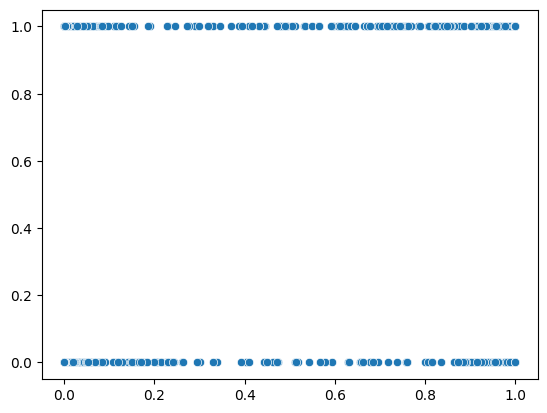

In [40]:
preds = conv_model.predict(x_valid)
preds = np.asarray([pred[0] for pred in preds])
corr_coef = np.corrcoef(preds, labels_valid)
sns.scatterplot(x= preds, y= labels_valid)

comparing mean value to check for any model bias towards either 0 or 1 [ cat or dog ]

In [41]:
print(preds.mean())
print(preds[labels_valid == 0].mean())
print(preds[labels_valid == 1].mean())

0.45514533
0.34821546
0.5620752


10 straightforward thresholds 

In [42]:
cat_quantity = sum(labels_valid)
for i in range(1,10):
    print('threshold :'+str(.1*i))
    print(sum(labels_valid[preds > .1*i])/labels_valid[preds > .1*i].shape[0])

threshold :0.1
0.5974264705882353
threshold :0.2
0.6164383561643836
threshold :0.30000000000000004
0.6272912423625254
threshold :0.4
0.6255230125523012
threshold :0.5
0.6274509803921569
threshold :0.6000000000000001
0.6289592760180995
threshold :0.7000000000000001
0.6258992805755396
threshold :0.8
0.6177215189873417
threshold :0.9
0.6197183098591549


Extracting an image from the validation dataset from an index as input, and then using converting the NumPy array into an image

Using 'np.asarray()' to convert the image from the validation dataset to a NumPy array. passing it through the 'conv_model' to obtain predicted probability that the image contains a dog

In [50]:
def animal_pic(index):
    return Image.fromarray(x_valid[index])
def dog_index(index):
    return conv_model.predict(np.asarray([x_valid[index]]))[0][0]

saving CNN as Keras model

In [44]:
 conv_model.save('conv_model_big')

testing model on validation data

probability extracted from the output of the model using '[0][0]'

1/1 [==============================] - 0s 45ms/step
probability of being a dog: 0.9999727606773376


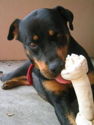

In [51]:
index = 600
print("Probability of being a Dog: {}".format(dog_index(index)))
animal_pic(index)

reshaping into 4D tensor with shape, passing it through the CNN( 'conv_model_predict') which outputs a prediction for the probability of input image being a dog

In [52]:
conv_model.predict(np.asarray([x_valid[124]]))[0][0]

1/1 [==============================] - 0s 70ms/step


0.9999851

loading a pre-trained Keral model called 'conv_model_big' and assigning it to be used for future prediction or fine-tuning on new data as 'big_model'

In [53]:
big_model = keras.models.load_model('conv_model_big')

#HUGE Convolutional Neural Network  

increasing size of convolutional layers, with 128 filters each 

In [54]:
fc_layer_size = 256
img_size = IMG_SIZE

conv_inputs = keras.Input(shape=(img_size[1], img_size[0],3), name='ani_image')

conv_layer = layers.Conv2D(128, kernel_size=3, activation='relu')(conv_inputs)
conv_layer = layers.MaxPool2D(pool_size=(2,2))(conv_layer)

conv_layer = layers.Conv2D(128, kernel_size=3, activation='relu')(conv_layer)
conv_layer = layers.MaxPool2D(pool_size=(2,2))(conv_layer)

conv_x = layers.Flatten(name = 'flattened_features')(conv_layer)
conv_x = layers.Dense(fc_layer_size, activation='relu', name='first_layer')(conv_x)
conv_x = layers.Dense(fc_layer_size, activation='relu', name='second_layer')(conv_x)
conv_outputs = layers.Dense(1, activation='sigmoid', name='class')(conv_x)
huge_conv_model = keras.Model(inputs=conv_inputs, outputs=conv_outputs)

In [55]:
customAdam = keras.optimizers.Adam(lr=1e-6)
huge_conv_model.compile(optimizer=customAdam,
              loss="binary_crossentropy",
              metrics=["binary_crossentropy","mean_squared_error"])

15 epochs. longer training time

In [56]:
print('# Fit model on training data')

history = huge_conv_model.fit(x_train, 
                    labels_train,
                    batch_size=64, 
                    shuffle = True,
                    epochs=15,
                    validation_data=(x_valid, labels_valid))

# Fit model on training data
Epoch 1/15
8/8 [==============================] - 88s 11s/step - loss: 156.7596 - binary_crossentropy: 156.7596 - mean_squared_error: 0.4470 - val_loss: 0.7015 - val_binary_crossentropy: 0.7015 - val_mean_squared_error: 0.2541
Epoch 2/15
8/8 [==============================] - 86s 11s/step - loss: 0.7214 - binary_crossentropy: 0.7214 - mean_squared_error: 0.2549 - val_loss: 0.6900 - val_binary_crossentropy: 0.6900 - val_mean_squared_error: 0.2465
Epoch 3/15
8/8 [==============================] - 89s 12s/step - loss: 0.6186 - binary_crossentropy: 0.6186 - mean_squared_error: 0.2163 - val_loss: 0.6909 - val_binary_crossentropy: 0.6909 - val_mean_squared_error: 0.2467
Epoch 4/15
8/8 [==============================] - 85s 11s/step - loss: 0.4361 - binary_crossentropy: 0.4361 - mean_squared_error: 0.1389 - val_loss: 0.9166 - val_binary_crossentropy: 0.9166 - val_mean_squared_error: 0.2918
Epoch 5/15
8/8 [==============================] - 86s 11s/step - loss: 0.33

In [57]:
preds = huge_conv_model.predict(x_valid)
preds = np.asarray([pred[0] for pred in preds])
np.corrcoef(preds, labels_valid)

32/32 [==============================] - 24s 753ms/step


array([[1.        , 0.10582743],
       [0.10582743, 1.        ]])

In [58]:
cat_quantity = sum(labels_valid)
for i in range(1,10):
    print('threshold :'+str(.1*i))
    print(sum(labels_valid[preds > .1*i])/labels_valid[preds > .1*i].shape[0])

threshold :0.1
0.5255172413793103
threshold :0.2
0.5279770444763271
threshold :0.30000000000000004
0.5282738095238095
threshold :0.4
0.5346687211093991
threshold :0.5
0.5451612903225806
threshold :0.6000000000000001
0.5432937181663837
threshold :0.7000000000000001
0.5443262411347518
threshold :0.8
0.5542857142857143
threshold :0.9
0.5505154639175258


In [59]:
huge_conv_model.save('conv_model_huge_e13')
big_model = keras.models.load_model('conv_model_huge_e13')


In [60]:
preds = big_model.predict(x_valid)
preds = np.asarray([pred[0] for pred in preds])
sum(labels_valid)

32/32 [==============================] - 25s 775ms/step


500

analysing how the accuracy of the model changes as the threshold changes 

In [61]:
for i in range(1,10):
    t = .1*i
    print("{:.1f}:".format(t))
    tp = (preds > t)&(labels_valid==1)
    tn = (preds <= t)&(labels_valid==0)
    print(np.sum(np.where(tp|tn, 1, 0))/1024.)

0.1:
0.5244140625
0.2:
0.5263671875
0.3:
0.525390625
0.4:
0.5322265625
0.5:
0.54296875
0.6:
0.5380859375
0.7:
0.537109375
0.8:
0.5439453125
0.9:
0.5361328125


10 epochs. batch size of 64, training 'big_model' with 'x_train' and 'labels_train' data

*   through repeated adjustments of weights, model learns to classify data better
* after training is complete, history variable containts information about the loss and accuracy of this model



In [62]:
print('# Fit model on training data')

history = big_model.fit(x_train, 
                    labels_train,
                    batch_size=64, 
                    shuffle = True,
                    epochs=10,
                    validation_data=(x_valid, labels_valid))

# Fit model on training data
Epoch 1/10
8/8 [==============================] - 94s 12s/step - loss: 2.7167 - binary_crossentropy: 2.7167 - mean_squared_error: 0.0961 - val_loss: 3.8687 - val_binary_crossentropy: 3.8687 - val_mean_squared_error: 0.3888
Epoch 2/10
8/8 [==============================] - 90s 12s/step - loss: 0.1687 - binary_crossentropy: 0.1687 - mean_squared_error: 0.0497 - val_loss: 2.2184 - val_binary_crossentropy: 2.2184 - val_mean_squared_error: 0.3585
Epoch 3/10
8/8 [==============================] - 69s 9s/step - loss: 0.0644 - binary_crossentropy: 0.0644 - mean_squared_error: 0.0163 - val_loss: 3.2871 - val_binary_crossentropy: 3.2871 - val_mean_squared_error: 0.3698
Epoch 4/10
8/8 [==============================] - 67s 9s/step - loss: 0.0448 - binary_crossentropy: 0.0448 - mean_squared_error: 0.0105 - val_loss: 3.7199 - val_binary_crossentropy: 3.7199 - val_mean_squared_error: 0.3952
Epoch 5/10
8/8 [==============================] - 84s 11s/step - loss: 0.0959 - b

evaluating performance of 'big_model' on the validation set at diferrent probability thresholds, to select an appropriate threshold for any intended purposes of application with this model.

In [63]:
preds = big_model.predict(x_valid)
preds = np.asarray([pred[0] for pred in preds])
for i in range(1,10):
    t = .1*i
    print("{:.1f}:".format(t))
    tp = (preds > t)&(labels_valid==1)
    tn = (preds <= t)&(labels_valid==0)
    print(np.sum(np.where(tp|tn, 1, 0))/1024.)

32/32 [==============================] - 30s 893ms/step
0.1:
0.55859375
0.2:
0.5625
0.3:
0.5673828125
0.4:
0.5625
0.5:
0.5546875
0.6:
0.5546875
0.7:
0.5537109375
0.8:
0.544921875
0.9:
0.541015625


creating a Receiver Operating Charateristic curve to show the relationship between the TPR and the FPR for different thresholds

*   the closer the ROC curve is to the top left corner, the better the performance of the classifier.



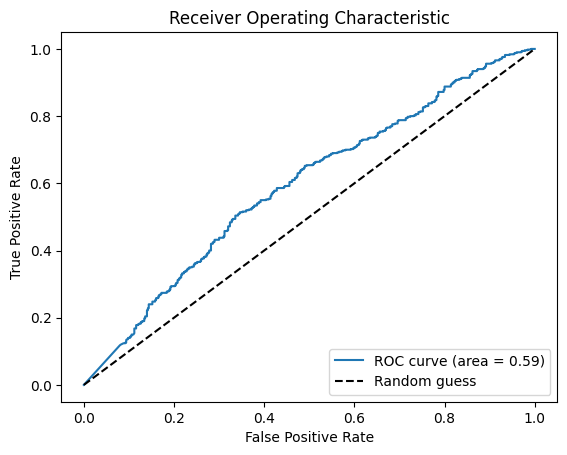

In [67]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(labels_valid, preds)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [68]:
big_model.save('conv_model_big_e19')